# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats

In [8]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [9]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Harsha Neel\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


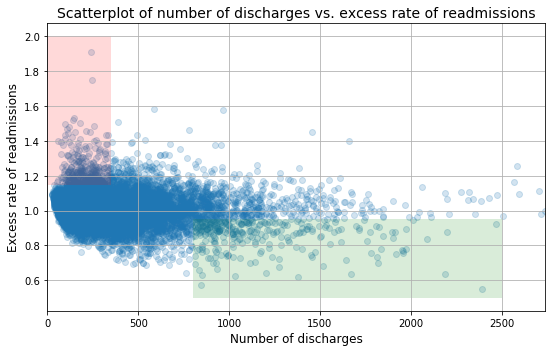

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [15]:
# Your turn
clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [49]:
clean_hospital_read_df.shape

(11578, 12)

The experiment has been wholly designed to only collect data around the discharges and readmissions ratio. No other factors have been recorded in the data.
This is important to observe because, the conclusions they have come to would be valid only if the experiment has been designed well and has accounted for all possible, measurable factors, and the data have been collected without errors.

In this case, there might have been many other factors that needed to be measured and included in this dataset. Otherwise, even if a correlation is seen, it might not necessarily imply causation since we don't have enough data.

In [13]:
# Lets get all the two columns into one dataframe
d = {"Discharges" : x, "Readmissions Ratio" : y}
data = pd.DataFrame(d)
data.head()

,Discharges,Readmissions Ratio
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


* To explore the differing observations about the lower and higher number of discharges, let us take a split of around below 350 discharges to be considered **clearly lower**, and fit a line for them to see if the trend matches the analysis above. 
* We will do the same thing for the higher number of discharges, choosing anything 800 and above to be considered **clearly higher**. Again we will fit a line through it to examine the trend.

The values for the lower (350) and higher (800) cutoffs are based ont he shaded region in the plot above.

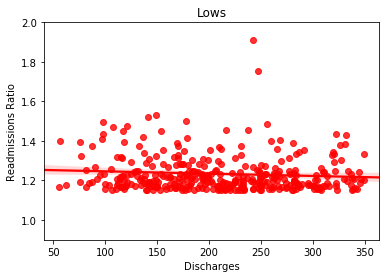

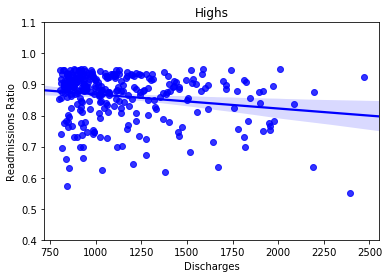

In [40]:
# lower
lows = data[data['Discharges'] < 350]
lows = lows[lows['Readmissions Ratio'] >= 1.15] 
lows = lows[lows['Readmissions Ratio'] <= 2.0]# bounds are based on the shaded region above
sns.regplot(x='Discharges', y='Readmissions Ratio', data = lows, fit_reg=True, color='r')
plt.title("Lows")
plt.ylim(0.9, 2.0)
plt.show()

# higher
highs = data[data['Discharges'] > 800]
highs = highs[highs['Readmissions Ratio'] >= 0.5] 
highs = highs[highs['Readmissions Ratio'] <= 0.95]# bounds are based on the shaded region above
sns.regplot(x='Discharges', y='Readmissions Ratio', data = highs, fit_reg=True, color='b')
plt.title("Highs")
plt.ylim(0.4, 1.1)
plt.show()

When the data is separated, their observations, highlighted in **section A**, come to light more clearly, as seen in the plots above.

In [48]:
low_less_100 = data[data['Discharges'] < 100]
high_more_1000 = data[data['Discharges'] > 1000]
low_discharge_mean, low_discharge_readm = low_less_100.mean()
high_discharge_mean, high_discharge_readm = high_more_1000.mean()

print("\nmean readm for discharges < 100: ", low_discharge_readm)
print("\nmean discharges < 100: ", low_discharge_mean)
print("\n%age of low discharge having readmission rate > 1: ", len(low_less_100[low_less_100['Readmissions Ratio'] > 1])/len(low_less_100))
print("\nmean readm for discharges > 1000: ", high_discharge_readm)
print("\nmean discharges > 1000: ", high_discharge_mean)
print("\n%age of high discharge having readmission rate > 1: ", len(high_more_1000[high_more_1000['Readmissions Ratio'] > 1])/len(high_more_1000))


mean readm for discharges < 100:  1.0226183501683506

mean discharges < 100:  74.71717171717172

%age of low discharge having readmission rate > 1:  0.6321548821548821

mean readm for discharges > 1000:  0.9790730434782613

mean discharges > 1000:  1361.2695652173913

%age of high discharge having readmission rate > 1:  0.44565217391304346


The observations based on the summary statistics and percentages also appear to be valid.

#### Conlusion 1: There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

Our data suggests this to be a reasonable conclusion, however, as I mentioned above, the causation cannot be concluded through this.

#### Conclusion 2: Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

This is a very reasonable conclusion to make, and generalize. Since this may well be true. It would be more useful to understand and enumerate all the resources necessary to ensure quality care and prevent complications. This requires grander experimental design.

#### Recommendation 1: Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

This is far too conlusive a recommendation to make. We do not have enough data to make a blanket generalization that the hospitals having < 300 discharges need to demonstrate this. We don't necessarily know that this was the contributing factor.

We can require hostpitals showing a lower **range** of discharges, who **also** have higher readmission rates to demonstrate that **they require upgraded resource allocation** and break it down further from there. This needs more analysis.

#### Recommendation 2: Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Even without the analysis, it logically follows that this could be beneficial all-around. More consolidation definitely allows for more funding and resources, better training etc., all of which will lead to better patient care, and in turn, indirectly, higher discharges and lower readmissions.

# New Analysis

Evaluating the existing hypothesis using the current dataset would not be useful since we have already discussed above, that there are not enough factors being captured in the data to evaluate it correctly.

As a result, we could focus on a different test altogether - one that is possible to analyze with the existing data set. Let us focus on the readmission rates by state. 

* **Null Hypothesis: There is no difference between the states for the excess readmission rates.**
* **Alternative Hypothesis: There is a difference between the states for the excess readmission rates.**

In [76]:
# Extract the relevant data and skipping the NaNs
x = list(clean_hospital_read_df['State'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
d = {'State' : x, 'Readm_Ratio' : y}
data = pd.DataFrame(d)
data.head()

,Readm_Ratio,State
0,1.0914,MD
1,1.0961,MD
2,1.0934,MD
3,1.0908,CA
4,1.1123,PA


In [77]:
# There seem to be multiple values under each state, so lets operate on the mean of each state. 
# For that we'll need to group by state and take the group average.

data_grouped = data.groupby(['State']).mean().reset_index()
data_grouped.head()

,State,Readm_Ratio
0,AK,0.979645
1,AL,1.019177
2,AR,1.030027
3,AZ,0.998832
4,CA,0.996700


In [78]:
data_grouped.shape

(51, 2)

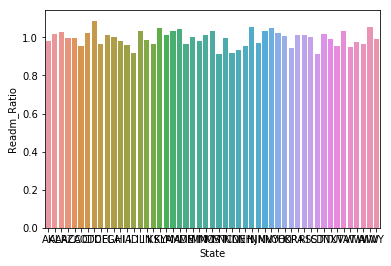

In [79]:
sns.barplot(x='State', y='Readm_Ratio', data=data_grouped)

It is very difficult to tell anything from teh bar plot, except that they all seem to vary within a very small range. Let us find that range.

In [80]:
data_grouped.describe()

,Readm_Ratio
count,51.000000
mean,0.994245
std,0.040946
min,0.909824
25%,0.965092
50%,0.998832
75%,1.023615
max,1.087121


Looks like the entire data ranges between 0.9 and 1.09. Let us find the lowest and the highest 20 and see how different they are.

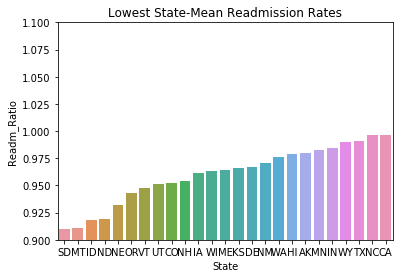

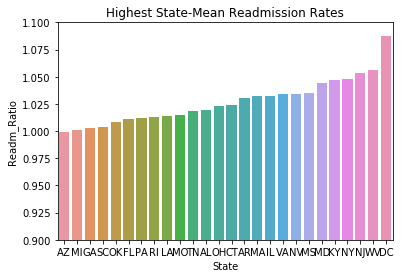

In [81]:
sortedData = data_grouped.sort_values(by='Readm_Ratio')
lowest = sortedData.head(25)
highest = sortedData.tail(26)

sns.barplot(x='State', y='Readm_Ratio', data=lowest)
plt.title("Lowest State-Mean Readmission Rates")
plt.ylim(0.9, 1.1)
plt.show()

sns.barplot(x='State', y='Readm_Ratio', data=highest)
plt.title("Highest State-Mean Readmission Rates")
plt.ylim(0.9, 1.1)
plt.show()

In the lowest, we can see a few states like South Dakota very close to hitting our lower limit of 0.9, and in the highest we see that they all at least go a little beyond 1.0. South Dakota is the lowest and DC, though not a state, is the highest. 

* **Question:** From this do we infer that the Capital of the country, DC, has the poorest healthcare or hospitals with inadequate resopurces?
* **Answer:** No, we do not have enough data to infer that, and also we are operating on state means, without taking into account a multitude of factors - how many admissions were there to begin with, before ebing readmitted, outliers, and a whole host of other bias-introducing factors in the data collection, randomizations etc.
* **For example:** DC may have had many more admissions and THEN readmissions than SD, which may not have had that many admissions to begin with, given the lower population density, fewer healthcare facilities etc. So, obviously DC's number would be higher, but that does not mean that resources or quality of healthcare is necessarily lower.

In [82]:
# Highest and lowest Averages.
highest_mean = np.mean(highest.Readm_Ratio.values)
print("\nMean of Highest: ", highest_mean)
lowest_mean = np.mean(lowest.Readm_Ratio.values)
print("\nMean of Lowest: ", lowest_mean)


Mean of Highest:  1.0268768645931656

Mean of Lowest:  0.960307237304648


* We have split our data into highest and lowest states, the highest having 26 records (including DC, which isn't a state), and the lowest having 25 records.
* But we will now test for the difference in means of between the **highest (DC)** and the **lowest (SD)** being significant. 


In [85]:
# Let us extract the relevant data from the original data frame
dc = data[data.State == 'DC'].Readm_Ratio
dc

98       1.1089
281      1.0995
989      1.0820
1416     1.0145
1452     1.0165
1601     1.0392
1902     1.1093
2355     0.9536
2525     1.0035
3020     0.9992
3041     1.0876
3920     1.0530
3973     1.1985
4070     1.1030
4565     1.0199
4572     1.1375
4863     0.9394
5014     1.7521
5411     1.0699
6096     1.0944
6185     1.1059
6431     1.0748
7854     1.0661
7975     1.1089
8535     1.0887
10055    1.0711
11104    1.1145
11363    0.9696
11396    1.0454
Name: Readm_Ratio, dtype: float64

In [86]:
sd = data[data.State == 'SD'].Readm_Ratio
sd

288      1.0093
369      0.9900
377      1.0137
587      0.9739
649      0.9686
1036     0.9496
2144     0.9832
2326     1.1523
2469     0.9666
2877     0.9528
2891     0.8880
3083     1.0547
3118     0.9047
3121     0.9646
3268     1.0064
3366     1.1117
4665     0.8897
5080     0.8426
5724     0.8465
6463     0.8333
6775     0.9002
7061     0.8236
7372     0.9969
7658     0.9031
7730     0.9426
7933     0.8384
8068     0.9736
8362     0.8667
8422     0.9552
8440     0.8381
8687     0.8416
8923     0.8280
9413     0.7996
9578     0.8468
9822     0.8808
9827     0.7062
9920     0.8216
10623    0.7394
10682    0.6600
10689    0.8951
10940    0.9431
Name: Readm_Ratio, dtype: float64

In [88]:
# We have the following data
mean_dc = np.mean(dc)
mean_sd = np.mean(sd)
mean_diff = mean_dc - mean_sd

# two sample independent t-test:
t, p = stats.ttest_ind(dc, sd)
print("\nt-value: ", t, " p-value: ", p)

# mean diff and 99% confidence interval:
ndc = len(dc)
nsd = len(sd)
ddf = ndc + nsd - 2
std_dc = np.std(dc)
std_sd = np.std(sd)
sigma = np.sqrt(((ndc - 1)*(std_dc**2)) + ((nsd - 1)*(std_sd**2))/ddf)
moe = stats.t.ppf(0.995, ddf) * sigma * np.sqrt(1/ndc + 1/nsd)

print("The 99% CI for difference between groups: ", mean_diff, " is [", mean_diff - moe, " to ", mean_diff + moe, "]")


t-value:  6.18483989150446  p-value:  4.0301006708812007e-08
The 99% CI for difference between groups:  0.1772962994112698  is [ -0.29358158483851093  to  0.6481741836610505 ]


**Conclusions and Recommendations:** The mean difference in the excess readmission rates for these two states is between the above two values. 

And with the given p-value above, we see that we can reject the Null Hypothesis and Accept the Alternative Hypothesis, i.e., there is a significant difference between the readmission rates between states.

We cannot make a recommendation based on this, given that SD and DC have an extremely different population density, which in itself might have lead to SD having a lower readmission rate, because of nto having had that many admissions to start off with. Also, it might be worth looking into collecting patient admission along with the readmission numbers for the next design, along with total population and population density to build a better hypothesis. 

The most one could recommend, looking at our tests between these two regions, is that based on expected population density and the fact that fewer measurements came from DC, we could say that DC does not have enough healthcare facilities to cater to the higher population. Based on this:
* We could recommend that DC allocate more funding towards healthcare, and healthcare management
* The existing recommendation from the previous analysis still holds good - consolidate/merge multiple healthcare facilities to manage care better. 